# **Data Load -> Cleaning -> Missing Data -> Feature Engineering -> Outliers  -> Feature Importance -> Train/Test Split -> Regression + Classification Models**

---



### **DATA LOAD**

---

In [1]:
import pandas as pd
import numpy as np

Load and read the dataset

In [2]:
url = "https://raw.githubusercontent.com/bapujik/dataSets/refs/heads/main/Bengaluru_House_Data.csv"
df= pd.read_csv(url)

Test the dataset is loaded or not. So we are going to use .head() , so that it will show the 1st 5 rows datas

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Check & Handle Missing Data**

In [4]:
#check missing values
a= df.isnull()
print(a)
print(a.sum())

       area_type  availability  location   size  society  total_sqft   bath  \
0          False         False     False  False    False       False  False   
1          False         False     False  False    False       False  False   
2          False         False     False  False     True       False  False   
3          False         False     False  False    False       False  False   
4          False         False     False  False     True       False  False   
...          ...           ...       ...    ...      ...         ...    ...   
13315      False         False     False  False    False       False  False   
13316      False         False     False  False     True       False  False   
13317      False         False     False  False    False       False  False   
13318      False         False     False  False    False       False  False   
13319      False         False     False  False     True       False  False   

       balcony  price  
0        False  False  
1  

In [5]:
#Remove cols with too many missing values which is "society"
df= df.drop(['society'],axis=1)

#we use axis=0 for rows and axis=1 for columns.

## **Fill missing values**



1. location           1    ------->most common value fill
2. bath              73    ------->median  common value fill
3. balcony          609    ------->median  common value fill
4. size              16    ------->most common value fill

These three we are going to fill with missing values. So that we will use function:  fillna()


In [6]:
b= df['bath'].median()
print(b)
c= df['balcony'].median()
print(c)
d= df['location'].mode()[0]
print(d)
e= df['size'].mode()[0]
print(e)

df['bath'].fillna(b, inplace=True)
df['balcony'].fillna(c, inplace=True)
df['location'].fillna(d, inplace=True)
df['size'].fillna(e, inplace=True)



2.0
2.0
Whitefield
2 BHK


/tmp/ipython-input-410911265.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(b, inplace=True)
/tmp/ipython-input-410911265.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [7]:
#check missing values
a= df.isnull()
print(a)
print(a.sum())

       area_type  availability  location   size  total_sqft   bath  balcony  \
0          False         False     False  False       False  False    False   
1          False         False     False  False       False  False    False   
2          False         False     False  False       False  False    False   
3          False         False     False  False       False  False    False   
4          False         False     False  False       False  False    False   
...          ...           ...       ...    ...         ...    ...      ...   
13315      False         False     False  False       False  False    False   
13316      False         False     False  False       False  False    False   
13317      False         False     False  False       False  False    False   
13318      False         False     False  False       False  False    False   
13319      False         False     False  False       False  False    False   

       price  
0      False  
1      False  
2     

See all are fixed

## **Feature Engineering**

Means to add new feature or outlayers may be impotant or not .... but may predict wrong by this......
So you can add new features according to your dataset.
I am taking this:

 price / total_sqft= per_sqft_price

In [8]:
print(df['total_sqft'].dtype)
print(df['total_sqft'].head())



object
0    1056
1    2600
2    1440
3    1521
4    1200
Name: total_sqft, dtype: object


In [9]:
# Convert total_sqft object to flot (handle ranges like 2100-2850, then it will add both and devide by 2, means (2100+2850)/2)
def convert_sqft(x):
    try:
        if '-' in str(x):
            a,b = str(x).split('-')
            return (float(a)+float(b))/2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft) #to convert total_sqft to float

print(df['total_sqft'].dtype)




float64


In [10]:
# Create price per sqft
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

df.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [11]:
print(df['price_per_sqft'].describe())



count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


In [12]:
print("Dataset shape:", df.shape)


Dataset shape: (13320, 9)


## **`Outlier Removal`**

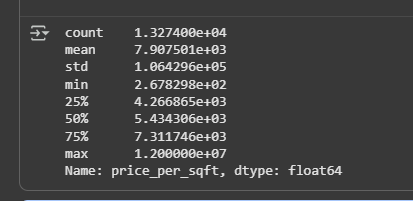

min, max aur percentile (25%, 50%, 75%)

Jo bahut chhote ya bahut bade numbers hain --> wo outliers hain. yeh prediction main dikat krta he

* min      2.678298e+02-----> 267.8  -----chota
* 25%      4.266865e+03---> 4266
* 50%      5.434306e+03---->5434
* 75%      7.311746e+03----->7311
* max      1.200000e+07------>12000000---> bada

So remove them

In [13]:
low_val=df['price_per_sqft'].quantile(0.01)
upr_val=df['price_per_sqft'].quantile(0.99)

Itna value rakhna he
* 25% 4.266865e+03---> 4266
* 50% 5.434306e+03---->5434
* 75% 7.311746e+03----->7311

In [14]:
df = df[(df['price_per_sqft'] >= low_val) & (df['price_per_sqft'] <= upr_val)]

In [15]:
print(df['price_per_sqft'].describe())

count    13008.000000
mean      6491.219027
std       3495.309094
min       2526.315789
25%       4285.714286
50%       5434.306291
75%       7250.145012
max      23404.109762
Name: price_per_sqft, dtype: float64


In [16]:
print("Dataset shape:", df.shape)


Dataset shape: (13008, 9)


#**Feature importance**

---


matlab har column (feature) ka model ke prediction me kitna impact hai.

***Matlab kaunse features zyaada important hain, aur kaunse kam important.***

Features:

total_sqft -> important (ghar size ka price pe direct effect)

bhk ->  important

balcony ->  thoda kam important

location ->  important (location se price change hota hai)

bath ->  thoda important

In [17]:
df = pd.get_dummies(df, columns=['location'], drop_first=True)
df.head()


,area_type,availability,size,total_sqft,bath,balcony,price,price_per_sqft,location_ Banaswadi,location_ Basavangudi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,Super built-up Area,19-Dec,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,Ready To Move,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Built-up Area,Ready To Move,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Ready To Move,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Ready To Move,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,False,False,...,False,False,False,False,False,False,False,False,False,False


location categorical -> numerical columns me convert ho gaya

In [18]:
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)
df.head()


,availability,size,total_sqft,bath,balcony,price,price_per_sqft,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,...,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Ready To Move,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Ready To Move,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Ready To Move,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Ready To Move,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,True


area_type categorical -> numerical columns me convert ho gaya



---



# **Train-Test Split**

---







Data ko train aur test me divide krna he.

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['price','size','availability'], axis=1)  # Yeh 'price','size','availability'ko chod ke baaki saab X he
y = df['price']  # Target for regression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# X_train,Y_train: 80% training
# X_test,Y_test: 20% testing


#   Regressor vs Classifier Difference

---



Regressor : For nuemeric data like (Price, Marks, Salary). we can use R², MAE (Mean Absolute Error)

Classifier: for catagory data like Yes/No, 0/1, Location A/Location B so we can use F1, Precision, Recall, Accuracy



## **1. Regressor**

---



## **R²** Score (Coefficient of Determination)  means how many variations explain by model


1 ke paas → perfect prediction

0 ke paas → model useless

In [20]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)   #<----- fit meaans train model

y_pred = reg_model.predict(X_test) # Prediction

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7439933716100566


~74.4% variation in house prices explain by model above

# **MAE** (Mean Absolute Error) This is the avg differences between Actual price (y_test) and Perdicted price (y_pred)

In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE (Mean Absolute Error):", mae)


MAE (Mean Absolute Error): 21.27709592904875


MAE = 21.28 lakh ₹ avg error

# **2. Classifier**

Here we will set price in 3 catagory like lower , medium and high

---



Accuracy --> Kitne % predictions sahi hain

Precision  -->  Positive class me kitne correct predictions hain

Recall  -->  Actual positive class me kitne predict hue

F1-Score  -->  Precision + Recall ka balance

In [22]:
def classify_price(p):
    if p < 50: return "0"  # 0 as Affordable
    elif p < 100: return "1"  # 1 as Mid-range
    else: return "2" #2 as Luxury"
df['price_category'] = df['price'].apply(classify_price)
df[['price','price_category']].head(10)


,price,price_category
0,39.07,0
1,120.00,2
2,62.00,1
3,95.00,1
4,51.00,1
5,38.00,0
6,204.00,2
7,600.00,2
8,63.25,1
10,70.00,1


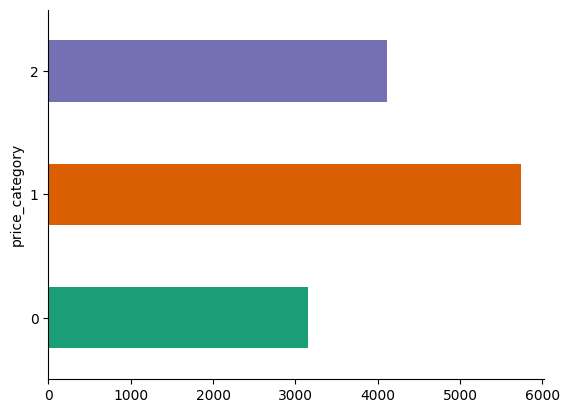

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
df['price_category'] = df['price_category'].astype(int)
print(df['price_category'].describe())


count    13008.000000
mean         1.073339
std          0.744113
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: price_category, dtype: float64


In [27]:
print(df['price_category'].dtype)



int64


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['price','size','availability','price_category'], axis=1)
y = df['price_category']

clf = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #train the classifier here
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)   #predict here

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9792467332820907
Precision: 0.9792648962644922
Recall: 0.9792467332820907
F1-Score: 0.9792473329120637


Accuracy ~97.9% --> Test data me predictions ka 97.9% sahi hain

Precision ~97.9% --> Predicted category me kitne sahi hain

Recall ~97.9% --> Actual category me kitne sahi predict hue

F1-Score ~97.9% --> Precision aur Recall ka balance